## Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import warnings

pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

## Load the csv file using Pandas

In [2]:
# load data into dataframe
data = pd.read_csv("D:\Downloads D\health\insurance.csv")
df = data.copy()
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data preprocessing

In [3]:
# get datatypes of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


*We have three categorical features and four numerical features. In categorical features, we have two types nominal and ordinal features.*

In [4]:
data.shape

(1338, 7)

*Our dataset has 1338 rows and 7 columns or features.*

In [5]:
# find out the amount of null values in each column
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

*As you can see they are no null values present in our dataset. So there is not much to do in this step.*

## Exploratory Data Analysis

In [6]:
#describe the data
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Distribution of Numerical columns

*Let's plot density plots and box plots for each feature for better visualization*

In [7]:
def plots(x):
    ''' Helper function to plot density,box plots and other relevant plots for a single feature
    '''
    x_min = data[x].min() # minimum value
    x_max = data[x].max() # maximum value
    mean_value = data[x].mean() # mean
    std = data[x].std() # standard deviation
    median = data[x].median() # median
    
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n'
          f'{x.capitalize()}(min) : {x_min}\n'
          f'{x.capitalize()}(mean): {mean_value}\n'
          f'{x.capitalize()}(standard Deviation):{std}\n'
          f'{x.capitalize()}(median):{median}\n'
          f'{x.capitalize()}(max) : {x_max}')
    
    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('pastel')
    
    plt.subplot(221)
    ax1 = sns.distplot(data[x], color = 'r')
    plt.title(f'{x.capitalize()} Density Distribution')
    
    plt.subplot(222)
    ax2 = sns.violinplot(x = data[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Violinplot')
    
    plt.subplot(223)
    ax2 = sns.boxplot(x=data[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')
    
    plt.subplot(224)
    ax3 = sns.kdeplot(data[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')
    
    plt.show()


5 Point Summary of Age Attribute:
Age(min) : 18
Age(mean): 39.20702541106129
Age(standard Deviation):14.049960379216154
Age(median):39.0
Age(max) : 64


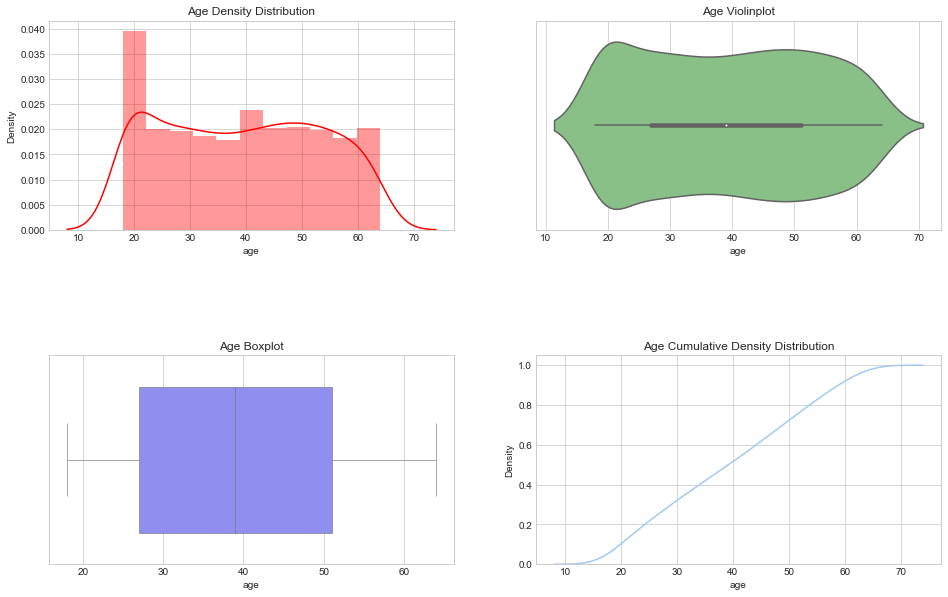

In [8]:

plots('age')

- *Observations:  
    1.The distribution of age is approximately normal with mean 39.20 and median 39.  
    2.The distribution is little bit skewed to left.  
    3.No outliers present in age feature.*

5 Point Summary of Bmi Attribute:
Bmi(min) : 15.96
Bmi(mean): 30.66339686098655
Bmi(standard Deviation):6.098186911679014
Bmi(median):30.4
Bmi(max) : 53.13


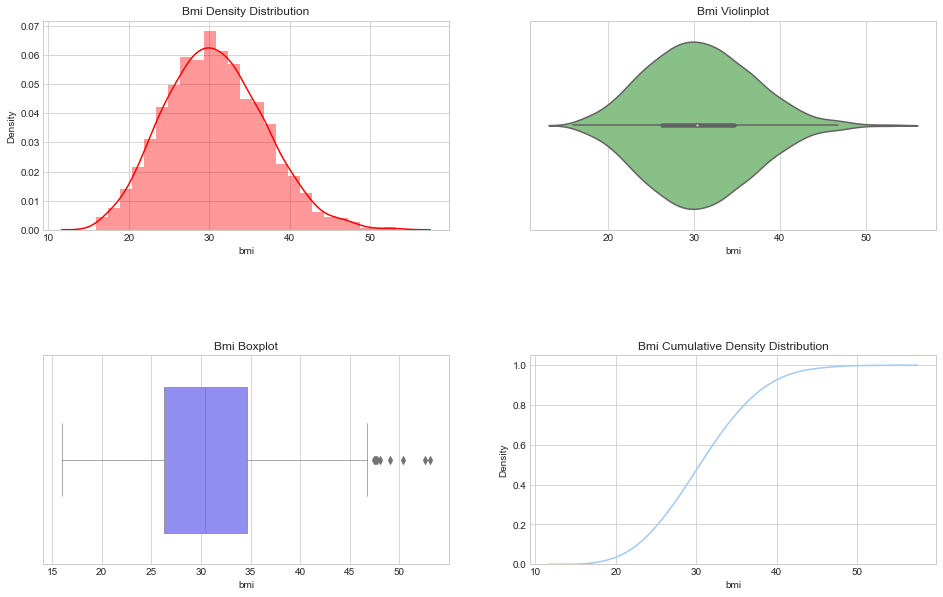

In [9]:
plots('bmi')

- *Observations:  
    1.The distribution of bmi follows approximately normal with mean 30.66 and median 30.4.   
    2.Distribution is little bit skewed to left.  
    3.As you can see in box plot, they are outliers present in this feature data.*

5 Point Summary of Charges Attribute:
Charges(min) : 1121.8739
Charges(mean): 13270.422265141257
Charges(standard Deviation):12110.011236694001
Charges(median):9382.033
Charges(max) : 63770.42801


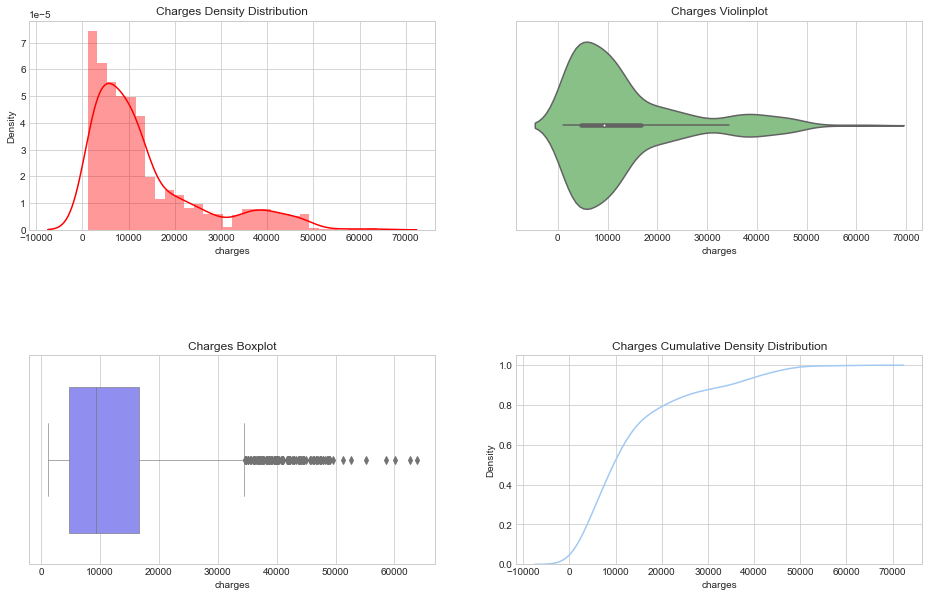

In [10]:
plots('charges')

- *Observations:  
    1.The distribution follows approximately a normal with mean 13270.42 and median 9382.82.  
    2.Distribution is heavily left skewed.  
    3.As you can see, they are quite a number of outliers present in the data. These may represent new trends in our data so dropping them might be a bad idea*

*Outliers are all present on one side of box plot. So best way to deal with them is to bring them within the boundries of box plot.*

### Distribution of categorical columns

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

#### Sex

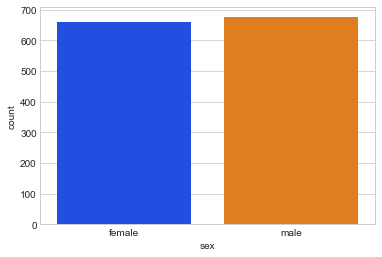

In [14]:
sns.countplot(data['sex'],palette='bright')
plt.show()

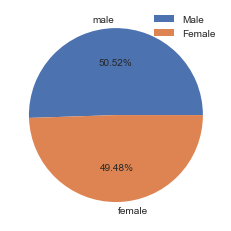

In [15]:
sex_data = data['sex'].value_counts().tolist()
labels = ['male','female']
colors = sns.color_palette('deep')[0:5]
plt.pie(sex_data, labels = labels, colors = colors, autopct='%.2f%%')
plt.legend(['Male','Female'])
plt.show()

- *The dataset is almost evenly distributed among genders, with 676 Males (50.5%) and 662 Fenales (49.5%).*

#### Children

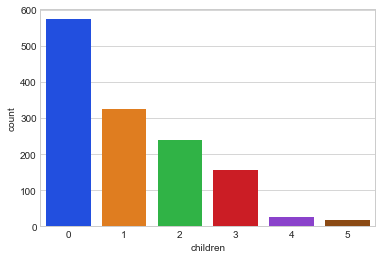

In [16]:
sns.countplot(data['children'],palette='bright')
plt.show()

In [17]:
data.groupby('children').agg('count')['age']

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: age, dtype: int64

- *Out of 1338 insured, almost 85 percent have less than three children.*

#### Smoker

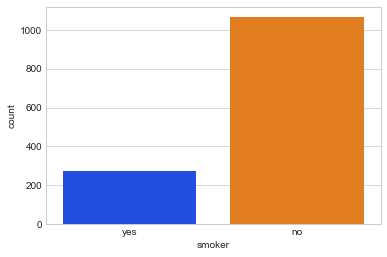

In [18]:
sns.countplot(data['smoker'],palette='bright')
plt.show()

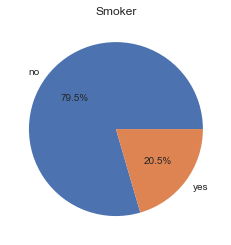

In [19]:
smoker_data = data['smoker'].value_counts().tolist()
labels = ['no','yes']
colors = sns.color_palette('deep')[0:5]
plt.pie(smoker_data, labels = labels, colors = colors, autopct='%.1f%%')
plt.title('Smoker')
plt.show()

*Are average premium charges for smokers significantly higher than non-smokers?*

In [20]:
data.groupby('smoker').agg('mean')['charges']

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

*yes, average premium charges for smokers are indeed significantly higher than non-smokers.*

In [21]:
data.groupby(['smoker', 'sex']).agg('count')['age']

smoker  sex   
no      female    547
        male      517
yes     female    115
        male      159
Name: age, dtype: int64

  - *Observations:  
    1.Out Of the total 1338 insured, 274 (20.5%) are smokers and the rest are non-smokers.  
    2.Among 274 smokers, proportion of males (159) are higher than females (115).  
    3.The average insurance premium for smokers are significantly higher than non-smokers.*

#### Region

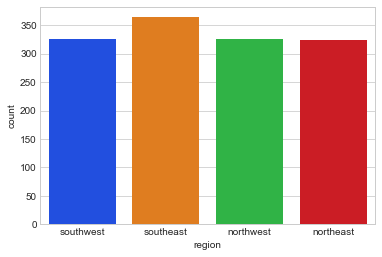

In [22]:
sns.countplot(data['region'],palette='bright')
plt.show()

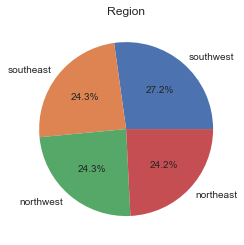

In [23]:
region_data = data['region'].value_counts().tolist()
labels = data['region'].unique().tolist()

colors = sns.color_palette('deep')[0:5]
plt.pie(region_data, labels = labels, colors = colors, autopct='%.1f%%')
plt.title('Region')
plt.show()

- *Observations:  
    1.All four regions are represented approximately evenly in the dataset.*

### Correlation

*First of all convert all categorical variables to numerical types.*

In [24]:
# create a list of all categorical variables

categorical_columns = ['sex','children','smoker','region']

# convert data type of these categorical variables to 'category' data type

for i in categorical_columns:
    data[i] = data[i].astype('category')

In [26]:
# preprocess the data before calculating correlation matrix

categorical_columns = ['sex','children','smoker','region']

data[categorical_columns] = data[categorical_columns].apply(lambda x:x.cat.codes)

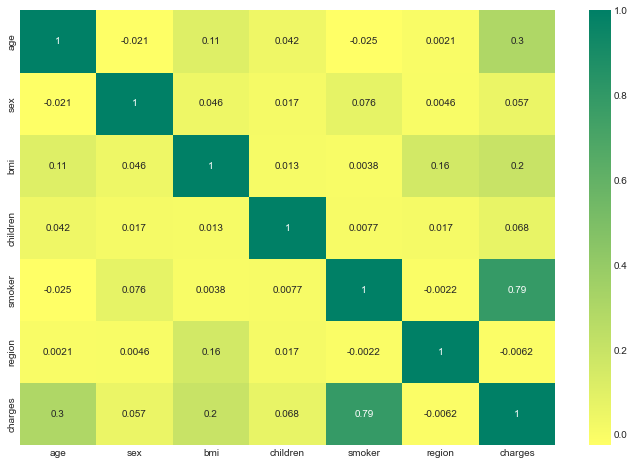

In [27]:
# use seaborn to visualise the correlation matrix

plt.figure(figsize=(12,8))

sns.heatmap(data.corr(),annot=True,cmap = 'summer_r')
plt.show()

- *Observations:  
    1.As expected no of childrens does not really affect the insurance charges.   
    2.Smoker is highly correlated with insurance charges.  
    3.Age,bmi and smoker features have good correlation with charges.* 
    

## Feature encoding

In [28]:
# create a new dataframe for feature encoding

df2 = df.copy()

# use pd.get_dummies to encode categorical variables

dummies = pd.get_dummies(df2[['sex','smoker','region']],drop_first=True)
dummies.head()

# concatenate df2 and dummies dataframes

df3 = pd.concat([df2,dummies],axis=1)
df3.drop(['sex','smoker','region'],axis=1,inplace=True)
df3.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


## Model selection and Training

In [29]:
# split the data into dependent and independent variables

X = df3.drop(['charges'],axis=1)
y = df3.charges


*Split the model into train and test data using sklearn module train_test_split.*

In [30]:
# split the data into training and testing data sets

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

*Create instances of various models that you want to train on your train data. And also I am not doing hyperparameter tuning in this project because it takes more time and computational power.*

In [37]:
lg = LinearRegression()
rg = RandomForestRegressor(n_estimators=100)
sr = SVR(kernel='linear')
dr = DecisionTreeRegressor()

In [51]:
# perform fitting and prediction for each model and store the results in a dictionary

score = []

mydict = {'Linear Regression':lg,'Random Forest':rg,'Support Vector Machines':sr,
         'Decision Tree':dr}

for model_name,model in mydict.items():
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    sc = model.score(X_test,y_test)
    mae = mean_absolute_error(y_predict,y_test)
    score.append({'Model':model_name,'Mean absolute error':mae,'Score':sc})

*You can create a dataframe from a list.*

In [52]:
res = pd.DataFrame.from_records(score) 

In [56]:
print(res)

                     Model  Mean absolute error     Score
0        Linear Regression          4051.858767  0.762331
1            Random Forest          2696.474845  0.850456
2  Support Vector Machines          6485.163446 -0.134377
3            Decision Tree          2887.882541  0.739252


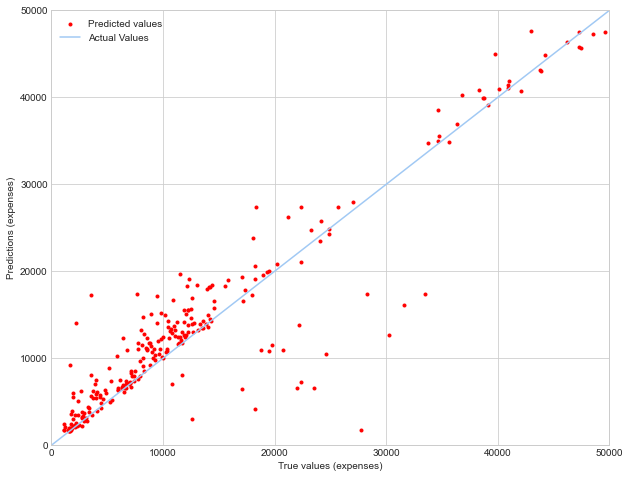

In [57]:
plt.figure(figsize=(10,8))
y_predict = rg.predict(X_test)
plt.scatter(y_test,y_predict,color='red',marker='.')
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
plt.legend(['Predicted values','Actual Values'])
plt.show()

In [58]:
from sklearn.metrics import r2_score
print('Accuracy of Random Forest Regression Model:',r2_score(y_test,y_predict))

Accuracy of Random Forest Regression Model: 0.8504560158378333


## Conclusion

- *As you can see from above dataframe, random forest regressor is the best model for our regression analysis with an accuracy score of 85%.*
- *Support vector machine perform poorly on this dataset.*
- *Second best regression is Linear regressor that have acheived an accuracy score of 76.23%.*
- *Accuracy score of decision forest lies in between linear regression and random forests.*